# Programming Exercise 2: Logistic Regression


분류를 여러가지 방법으로 해결해본다.

Logistic Regression

Support Vector Machine

K-Nearest Neighbors

Neural Network


## Introduction





In [1]:
import os
import numpy as np
import pandas as pd
# Plotting library
from matplotlib import pyplot as plt


## 1 Scikit Learn use.

https://www.kaggle.com/code/paolamadrigal/comparing-different-algorithms/data


In [2]:
#DATA LOAD
import os
from six.moves import urllib

for fn_dst in ['classification.csv']:
    fn_src = 'https://raw.githubusercontent.com/suakii/1stgradeCS/main/ex2/data/%s' % fn_dst

    if os.path.isfile(fn_dst):
        print('File %s is already downloaded' % fn_dst)
    else:
        print('Downloaded %s' % fn_dst)
        urllib.request.urlretrieve(fn_src, fn_dst)


Downloaded classification.csv


### 1.1 Logistic Regression
2진분류


데이터 불러오기


In [3]:
# Read comma separated data
data = pd.read_csv('classification.csv')

print(type(data))
print(data.shape)
df = data.copy()


<class 'pandas.core.frame.DataFrame'>
(297, 3)


In [4]:
df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [6]:
df.columns

Index(['age', 'interest', 'success'], dtype='object')

In [7]:
df.describe()

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


### 1.2 Plotting the Data

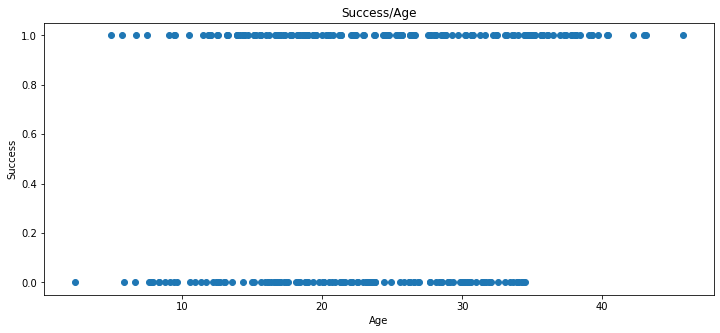

In [9]:
fig, axes = plt.subplots(figsize=(12,5))
axes.scatter(df['age'], df['success']);
axes.set_xlabel('Age')
axes.set_ylabel('Success')
axes.set_title('Success/Age');

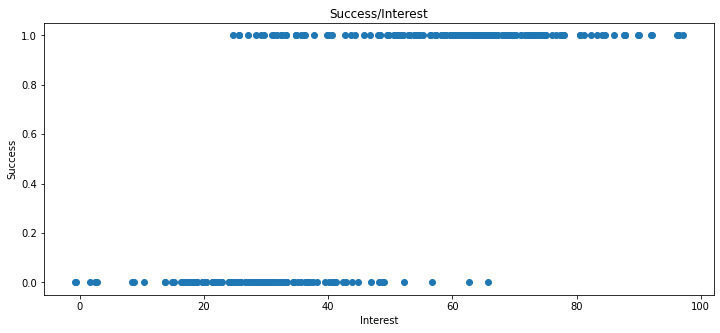

In [10]:
fig, axes = plt.subplots(figsize=(12,5))
axes.scatter(df['interest'], df['success']);
axes.set_xlabel('Interest')
axes.set_ylabel('Success')
axes.set_title('Success/Interest');

이 분류 문제를 사이킷 런을 통해 간단하게 해결해본다.

In [12]:
from sklearn.model_selection import train_test_split

x = df[['age', 'interest']]
y = df[['success']]

print(x.shape)
print(y.shape)


(297, 2)
(297, 1)


In [13]:
#훈련용 데이터와 테스트 데이터로 원래 데이터를 나누어 본다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(237, 2)
(60, 2)
(237, 1)
(60, 1)


In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
train_accuracy = round(log_reg.score(X_train, y_train),4)
test_accuracy = round(log_reg.score(X_test, y_test),4)
print(train_accuracy, test_accuracy)


0.8692 0.9167


Support Vector Machine


In [16]:
from sklearn.svm import SVC


In [17]:
svm = SVC()
svm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [18]:
train_accuracy = round(svm.score(X_train, y_train),4)
test_accuracy = round(svm.score(X_test, y_test),4)
print(train_accuracy, test_accuracy)

0.8945 0.9333


In [19]:
def plotData(X, y, grid=False):
    X_new = X.copy()
    y_new = y.copy()
    X_new = X.to_numpy()
    y_new = y.to_numpy()
    pos = y_new == 1
    neg = y_new == 0
    
    pos = pos.flatten()
    neg = neg.flatten()
    fig, axes = plt.subplots(figsize=(12,10))
    axes.plot(X_new[pos, 0], X_new[pos, 1], 'X', mew=1, ms=10, mec='k')
    axes.plot(X_new[neg, 0], X_new[neg, 1], 'o', mew=1, mfc='y', ms=10, mec='k')
    axes.grid(grid)

In [20]:
def plot_boundary(X, y, model):
    X_new = X.copy()
    y_new = y.copy()
    X_new = X.to_numpy()
    y_new = y.to_numpy()

    X0 = X_new[:, 0]
    X1 = X_new[:, 1]
    
    x0_min, x0_max = X0.min() - 0.04, X0.max() + 0.04
    x1_min, x1_max = X1.min() - 0.04, X1.max() + 0.04
    
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, 0.1),
                           np.arange(x1_min, x1_max, 0.1))

    
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    z = z.reshape(xx0.shape)
    
    plotData(X, y)
    plt.contour(xx0, xx1, z, 1, colors='b')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


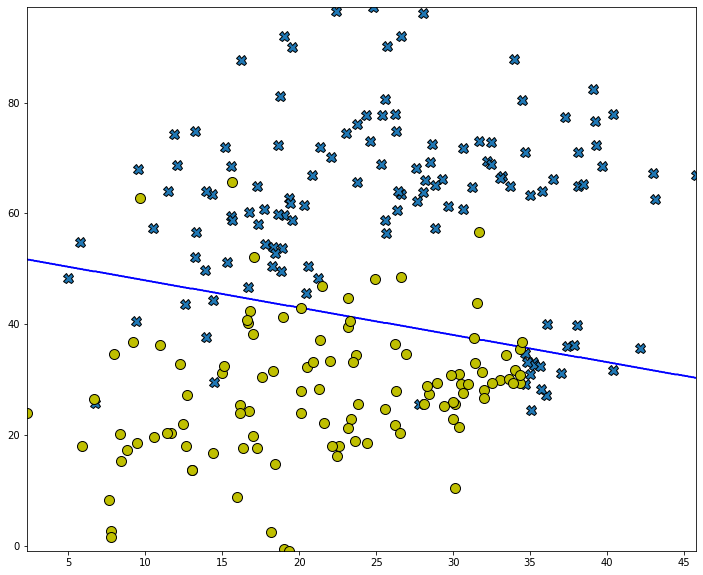

In [21]:
plot_boundary(X_train, y_train, log_reg)

SVM을 이용한 분류 과정을 시각화해서 다음과 같이 볼 수 있다.

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


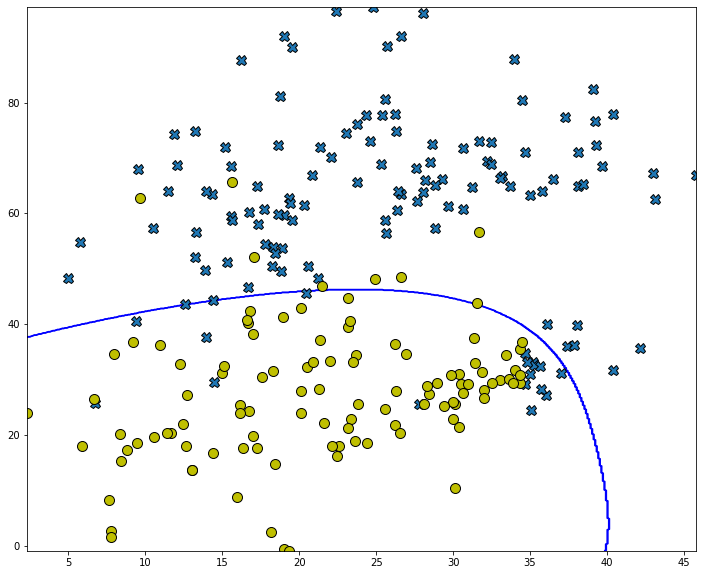

In [22]:
plot_boundary(X_train, y_train, svm)

In [23]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


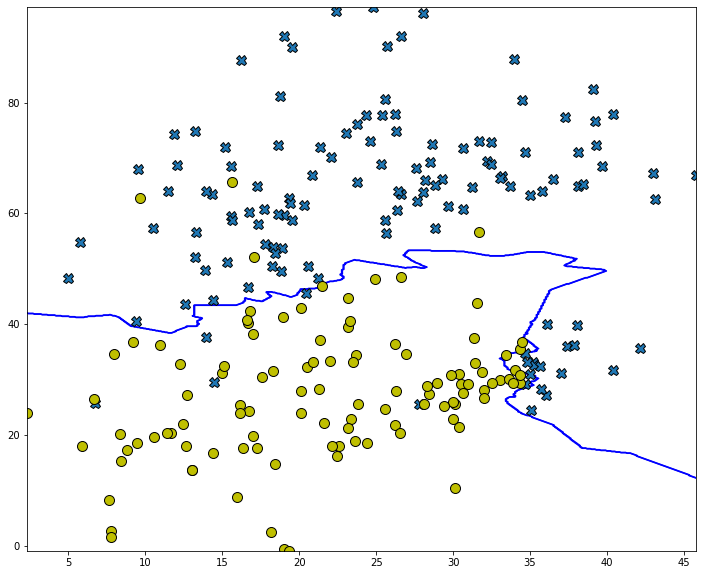

In [24]:
plot_boundary(X_train, y_train, knn_model)

## 2 신경망으로 구분하기 


In [25]:
#simple binary classification model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


def build_model():
  model = keras.Sequential([
        layers.Flatten(input_shape=(2,)),
        layers.Dense(200, activation='relu'),
	    layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
      ])

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


model = build_model()

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 200)               600       
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 20,801
Trainable params: 20,801
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(X_train, y_train, epochs = 100, batch_size=10)



Epoch 1/100
24/24 [==============================] - 4s 3ms/step - loss: 0.6405 - accuracy: 0.6793
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.7046
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7131
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5500 - accuracy: 0.7384
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5075 - accuracy: 0.7426
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7848
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4868 - accuracy: 0.7553
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5431 - accuracy: 0.7553
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4798 - accuracy: 0.8101
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7890
Epoch 11/

In [27]:
train_accuracy = round(model.evaluate(X_train, y_train)[1],4)
test_accuracy = round(model.evaluate(X_test, y_test)[1],4)

2/2 [==============================] - 0s 4ms/step - loss: 0.1729 - accuracy: 0.9500


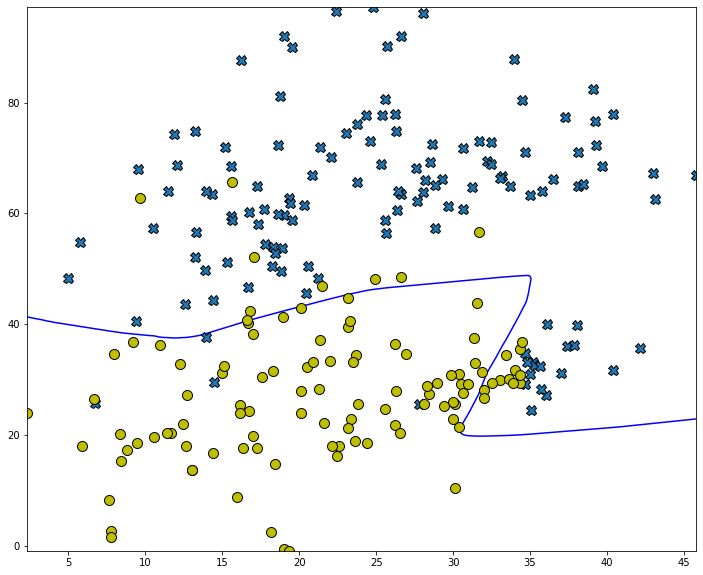

In [28]:
plot_boundary(X_train, y_train, model)